# NU_1

In [ ]:
!pip install lightgbm

In [ ]:
import pandas as pd
import numpy as np

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
# data = pd.read_pickle('/content/drive/MyDrive/Thesis/DATASETS/NU_Temporal_data_with_trip_info.pkl')
# data = data.drop(['id','created_at','trip_created_at','customer_id','trip_start_date','done_at_date'],1)
# data

In [3]:
# data.loc[data.trip_id == 120190]

In [4]:
# max(data.loc[data.trip_id == 120190].trip_start)

In [ ]:
# import warnings
# warnings.filterwarnings("ignore")

# dataframe = pd.DataFrame()

# for trip in list(data.trip_id.unique()):

#   trip_i = data.loc[data.trip_id == trip].sort_values('done_at').reset_index(drop = True)
#   trip_i['travel_start'] = None

#   for i in range(0,len(trip_i)):
#     if i == 0:
#       trip_i['travel_start'][i] = max(trip_i.trip_start)
#     else:
#       trip_i['travel_start'][i] = trip_i['done_at'][i-1]

#     trip_i['planned_arrival'][i] = str(trip_i.done_at[0])[0:10] +' '+ str(trip_i['planned_arrival'][i]) 

#   dataframe = dataframe.append(trip_i)

In [ ]:
# from sklearn.preprocessing import LabelEncoder
# from datetime import time

# def data_preprocessing(data):

#     labelencoder = LabelEncoder()

#     data['driver_id'] = labelencoder.fit_transform(data['driver_id'])
#     data['driven_by_charter'] = labelencoder.fit_transform(data['driven_by_charter'])
#     # data['end'] = labelencoder.fit_transform(data['end'])

#     # data['Timestamp'] = data['Date'].dt.strftime('%Y-%m-%d').astype('str') +' '+ data['TOD'].astype('str')
#     data['travel_start'] = data['travel_start'].astype(np.datetime64)
#     data['planned_arrival'] = data['planned_arrival'].astype(np.datetime64)

#     data = data.sort_values('done_at').reset_index(drop=True)

#     data['dept_hour'] = data['travel_start'].dt.hour
#     data['dept_minute'] = data['travel_start'].dt.minute
#     data['dept_dayofweek'] = data['travel_start'].dt.dayofweek
#     data['dept_monthofyear'] = data['travel_start'].dt.month 

#     data['scheduled_hour'] = data.planned_arrival.dt.hour
#     data['scheduled_minute'] = data.planned_arrival.dt.minute

#     # Remove timezone from trip_created_at
#     data['done_at'] = [dt.replace(tzinfo=None) for dt in data['done_at']]

#     data['travel_time'] = (data.done_at - data.travel_start).dt.seconds/60 

#     data = data.drop(['trip_id','planned_arrival','done_at','trip_start','travel_start'],1)
    
#     return data

In [ ]:
# dataset = data_preprocessing(dataframe)

In [5]:
# dataset.to_pickle('/content/drive/MyDrive/Thesis/DATASETS/NU_1.pkl')

In [7]:
# import pickle

# dataset = pd.read_pickle('NU_1.pkl')

In [6]:
# dataset

In [2]:
# # train_data = data[data.dept_monthofyear < 6]
# # test_data = data[data.dept_monthofyear == 6]

# from sklearn.model_selection import train_test_split

# X = dataset.drop(['travel_time'],1)
# y = dataset['travel_time']

# train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.20, stratify = X['dept_dayofweek'], random_state=1)

In [10]:
import pickle

with open('NU_1_data/train_x.pkl','rb') as f:
    train_x = pickle.load(f)

with open('NU_1_data/train_y.pkl','rb') as f:
    train_y = pickle.load(f)

with open('NU_1_data/test_x.pkl','rb') as f:
    test_x = pickle.load(f)

with open('NU_1_data/test_y.pkl','rb') as f:
    test_y = pickle.load(f)

In [11]:
train_x

,driven_by_charter,quantity,trip_ordering,driver_id,dept_hour,dept_minute,dept_dayofweek,dept_monthofyear,scheduled_hour,scheduled_minute
19565,1,1,11,109,16,46,2,6,18,50
102373,1,1,6,210,16,25,2,7,18,40
123153,1,1,15,216,16,51,1,10,19,24
135097,1,1,16,240,18,54,2,12,20,35
102253,1,1,4,134,13,26,2,7,15,51
...,...,...,...,...,...,...,...,...,...,...
73349,1,1,10,183,18,11,2,2,20,28
109259,1,1,5,121,15,52,2,7,18,17
50057,1,1,2,135,17,10,4,11,18,0
5192,1,1,23,119,15,23,1,4,17,21


In [12]:
import pandas as pd
import numpy as np
import lightgbm as lgb
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

# Create the parameter grid: gbm_param_grid
hyper_params = {
    'learning_rate': [0.001, 0.01, 0.02, 0.1, 0.2, 0.3, 0.4, 0.5],
    'bagging_freq': [5,10,15],
    'n_estimators': [300,400,500,800,1000],
    'max_depth': range(4, 12)
}

# Instantiate the regressor: gbm
gbm = lgb.LGBMRegressor()

# Perform grid search: grid_mse
grid_mse = GridSearchCV(param_grid=hyper_params, estimator=gbm, 
                        scoring='neg_mean_squared_error', cv=2, verbose=1)

# Fit grid_mse to the data
grid_mse.fit(train_x, train_y)

# Print the best parameters and lowest RMSE
print("Best parameters found: ", grid_mse.best_params_)
print("Lowest RMSE found: ", np.sqrt(np.abs(grid_mse.best_score_)))

Fitting 2 folds for each of 960 candidates, totalling 1920 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1920 out of 1920 | elapsed: 52.2min finished


Best parameters found:  {'bagging_freq': 5, 'learning_rate': 0.1, 'max_depth': 11, 'n_estimators': 1000}
Lowest RMSE found:  25.266423197165878


In [13]:
#Fitting lgb regressor 
model = lgb.LGBMRegressor(objective= 'regression', eval_metric= 'rmse',
                         bagging_freq= 5, learning_rate= 0.1, max_depth= 11, n_estimators= 1000)
model.fit(train_x,train_y)
print (model)

LGBMRegressor(bagging_freq=5, eval_metric='rmse', max_depth=11,
              n_estimators=1000, objective='regression')


In [14]:
import pickle

file_name = "lgb_reg_NU_1.pkl"

# save
pickle.dump(model, open(file_name, "wb"))

# load
lgb_model_loaded = pickle.load(open(file_name, "rb"))

In [ ]:
# test_x, test_y = test_data.drop(['Travel Time'],1), test_data['Travel Time']

In [ ]:
# test_x

,start,end,distance,LanePts,dept_hour,dept_minute,dept_dayofweek,dept_monthofyear
167904,4,6,77.90,202,0,0,0,6
167905,5,5,6.28,3,0,0,0,6
167906,2,2,35.89,77,0,0,0,6
167907,0,1,58.74,144,0,0,0,6
167908,1,3,30.58,24,0,0,0,6
...,...,...,...,...,...,...,...,...
211387,1,3,30.58,24,23,55,1,6
211388,2,2,35.89,78,23,55,1,6
211389,5,5,6.28,3,23,55,1,6
211390,4,6,77.90,201,23,55,1,6


In [15]:
# Evaluate Model

from sklearn.metrics import mean_absolute_error, r2_score
import math

def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    mae = mean_absolute_error(test_labels, predictions)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(np.abs(errors / test_labels))
    accuracy = 100 - mape
    MSE = np.square(np.subtract(test_labels,predictions)).mean() 
    RMSE = math.sqrt(MSE)
    R2 = r2_score(test_labels,predictions)
    print('Model Performance')
    print('MAE: {:0.4f} minutes.'.format(np.mean(errors)))
    print('RMSE: {:0.2f}.'.format(RMSE))
    print('R2: {:0.2f}.'.format(R2))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

In [16]:
evaluate(lgb_model_loaded, test_x, test_y)

Model Performance
MAE: 14.4033 minutes.
RMSE: 26.54.
R2: 0.81.
Accuracy = -inf%.


-inf

In [17]:
predictions = lgb_model_loaded.predict(test_x)

In [18]:
pre_ac = pd.DataFrame()

pre_ac['Actual'] = test_y
pre_ac['Prediction'] = predictions
pre_ac['dayofweek'] = test_x['dept_dayofweek']
pre_ac['travels'] = [l for l in range(0,len(predictions))]

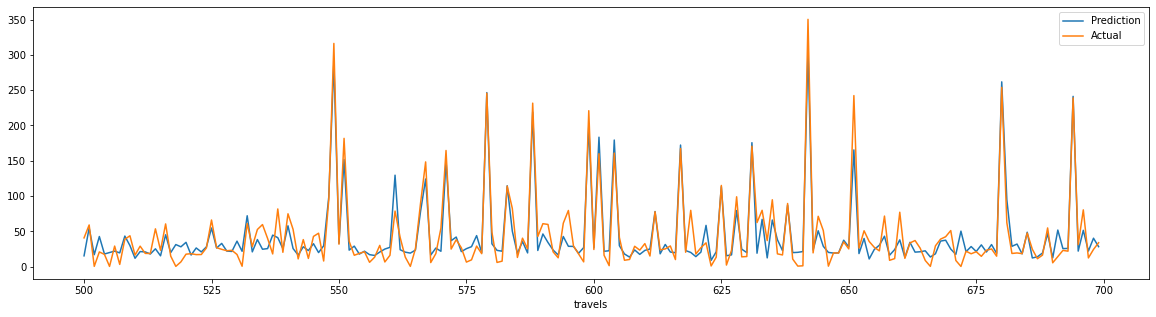

In [20]:
import matplotlib.pyplot as plt

##### plot according to time of day

pre_ac[500:700].plot(x= "travels" , y=['Prediction', 'Actual'])
plt.rcParams["figure.figsize"] = (20,5)
plt.show()

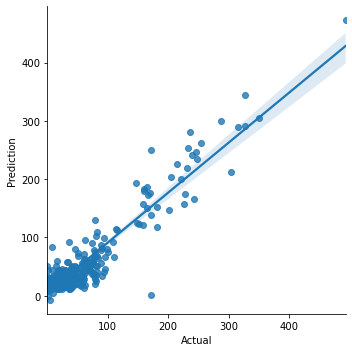

In [21]:
import seaborn as sns

sns.lmplot(x="Actual", y="Prediction", data=pre_ac[500:1000]);

In [12]:
import shap
 
# load JS visualization code to notebook
shap.initjs()

# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn, transformers, Spark, etc.)
explainer = shap.TreeExplainer(lgb_model_loaded)
shap_values = explainer.shap_values(test_x)

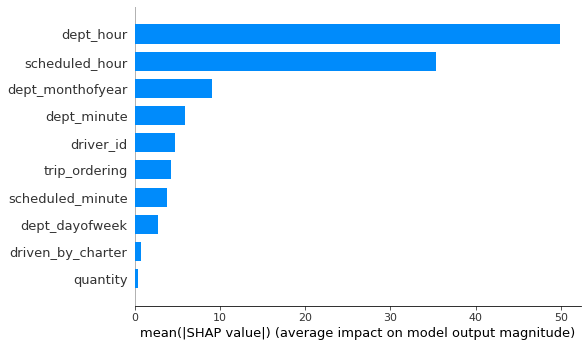

In [17]:
shap.summary_plot(shap_values, train_x, feature_names = test_x.columns, plot_type="bar")

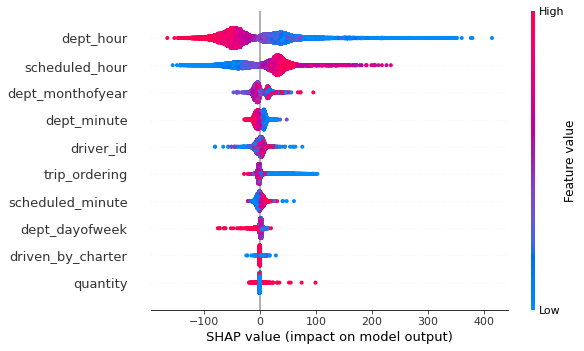

In [16]:
import matplotlib.pyplot as plt

f = plt.figure()
shap.summary_plot(shap_values, test_x, feature_names = test_x.columns)

In [26]:
shap_values[0]

array([ 2.51477543e+00,  2.17937500e-01, -3.27068110e+00, -1.99103787e-02,
        6.95963299e+00,  4.14500915e+00, -1.64689273e+00, -2.29482928e-01,
       -3.35355986e+01,  2.75492742e+00])

In [24]:
test_x

,driven_by_charter,quantity,trip_ordering,driver_id,dept_hour,dept_minute,dept_dayofweek,dept_monthofyear,scheduled_hour,scheduled_minute
13353,0,1,9,60,10,9,4,5,10,42
36500,1,1,2,169,7,30,5,9,8,51
47506,0,1,1,8,3,59,2,11,8,30
60646,1,1,8,128,16,33,1,1,18,43
12322,1,1,19,122,13,19,5,5,13,1
...,...,...,...,...,...,...,...,...,...,...
104479,0,1,9,124,10,2,3,7,12,40
58529,0,1,8,64,7,6,4,12,11,7
13107,1,1,7,71,16,14,2,5,17,8
108987,0,1,6,35,16,22,1,7,19,8


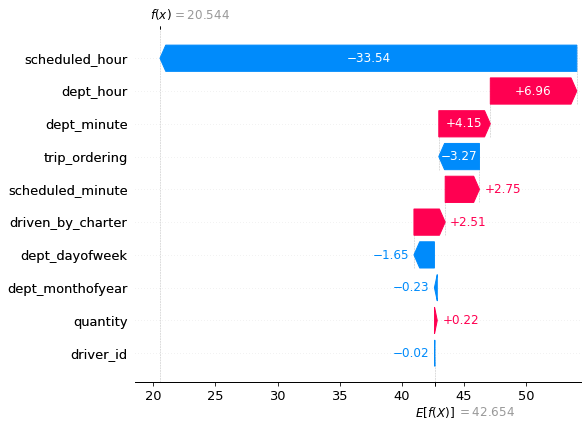

In [13]:
'''The explanation below shows features each contributing to push the model output from the base value 
(the average model output over the training dataset we passed) to the model output. Features pushing the 
prediction higher are shown in red, those pushing the prediction lower are in blue.'''


shap.plots._waterfall.waterfall_legacy(explainer.expected_value, shap_values[0], feature_names = test_x.columns, show = True)

In [14]:
shap.initjs()

# visualize the first prediction's explanation with a force plot
shap.force_plot(explainer.expected_value, shap_values[0], feature_names = test_x.columns, show = True)

In [15]:
shap.initjs()

shap.force_plot(explainer.expected_value, shap_values[0:1000], feature_names = test_x.columns, show = True)

In [18]:
explainer.expected_value

42.65437693723341

In [21]:
shap_values

array([[ 2.51477543e+00,  2.17937500e-01, -3.27068110e+00, ...,
        -2.29482928e-01, -3.35355986e+01,  2.75492742e+00],
       [-4.28895343e-01, -6.49425264e-01,  6.77934198e+00, ...,
        -2.79506798e+00, -6.58734349e+01,  7.42137919e-01],
       [ 2.39435846e-02,  3.06520900e-01,  1.79587034e+01, ...,
         3.07803266e+01, -4.17175209e+01, -9.36514080e+00],
       ...,
       [-2.58231787e-01, -7.44971116e-02, -1.80036435e+00, ...,
        -1.95443122e+00,  2.40331386e+01, -4.75859555e+00],
       [ 2.11551384e+00, -8.13437654e-02,  1.31901359e+00, ...,
        -8.29349201e+00,  2.93657422e+01, -3.62310231e+00],
       [-9.40504643e-02,  1.54955827e-01, -2.49094147e+00, ...,
        -8.49276396e+00,  4.85627777e+01, -3.69467787e+00]])

In [20]:
test_x.columns

Index(['driven_by_charter', 'quantity', 'trip_ordering', 'driver_id',
       'dept_hour', 'dept_minute', 'dept_dayofweek', 'dept_monthofyear',
       'scheduled_hour', 'scheduled_minute'],
      dtype='object')

In [ ]:
# !pip install lime

In [ ]:
import lime
import lime.lime_tabular

In [ ]:
explainer = lime.lime_tabular.LimeTabularExplainer(train_x, feature_names=test_x.columns, class_names=['Travel Time'], verbose=True, mode='regression')

TypeError: '(slice(None, None, None), 0)' is an invalid key